In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('data/london_crime_by_lsoa.csv')

In [37]:
#Removing all entries where crime value is null
df=df[df.value!=0]

In [38]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [39]:
df.info

<bound method DataFrame.info of           lsoa_code               borough               major_category  \
9         E01004177                Sutton           Theft and Handling   
16        E01000086  Barking and Dagenham           Theft and Handling   
24        E01001301                Ealing           Theft and Handling   
25        E01001794               Hackney  Violence Against the Person   
32        E01000733               Bromley              Criminal Damage   
...             ...                   ...                          ...   
13490581  E01000789               Bromley  Violence Against the Person   
13490584  E01003301              Lewisham  Violence Against the Person   
13490590  E01001679             Greenwich           Theft and Handling   
13490592  E01033327              Lewisham  Violence Against the Person   
13490600  E01002504            Hillingdon                      Robbery   

                            minor_category  value  year  month  
9             

In [40]:
df.shape

(3419099, 7)

In [41]:
df.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [42]:
#Checking for null values
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [43]:
#Checking unique values for major_categories
df['major_category'].unique()

array(['Theft and Handling', 'Violence Against the Person',
       'Criminal Damage', 'Robbery', 'Burglary',
       'Other Notifiable Offences', 'Drugs', 'Sexual Offences',
       'Fraud or Forgery'], dtype=object)

In [44]:
df['major_category'].value_counts()

Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: major_category, dtype: int64

In [45]:
df['minor_category'].unique()

array(['Theft/Taking of Pedal Cycle', 'Other Theft Person', 'Harassment',
       'Criminal Damage To Motor Vehicle', 'Other Theft',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Theft From Shops', 'Assault with Injury', 'Personal Property',
       'Burglary in a Dwelling', 'Burglary in Other Buildings',
       'Common Assault', 'Business Property', 'Offensive Weapon',
       'Going Equipped', 'Motor Vehicle Interference & Tampering',
       'Criminal Damage To Dwelling', 'Theft From Motor Vehicle',
       'Possession Of Drugs', 'Criminal Damage To Other Building',
       'Other Notifiable', 'Other Criminal Damage', 'Other violence',
       'Handling Stolen Goods', 'Drug Trafficking', 'Murder',
       'Other Sexual', 'Counted per Victim', 'Other Drugs', 'Rape',
       'Other Fraud & Forgery'], dtype=object)

In [46]:
df['minor_category'].value_counts()

Other Theft                               297281
Theft From Motor Vehicle                  291839
Burglary in a Dwelling                    278792
Assault with Injury                       244990
Harassment                                243827
Common Assault                            231398
Possession Of Drugs                       201464
Criminal Damage To Motor Vehicle          179380
Theft/Taking Of Motor Vehicle             163069
Burglary in Other Buildings               162417
Personal Property                         144078
Other Theft Person                        121674
Criminal Damage To Dwelling               121592
Other Criminal Damage                     112449
Theft/Taking of Pedal Cycle               104947
Theft From Shops                           94947
Wounding/GBH                               90482
Other Notifiable                           75483
Criminal Damage To Other Building          52847
Other violence                             50620
Motor Vehicle Interf

[Text(0, 0, 'Theft and Handling'),
 Text(1, 0, 'Violence Against the Person'),
 Text(2, 0, 'Criminal Damage'),
 Text(3, 0, 'Burglary'),
 Text(4, 0, 'Drugs'),
 Text(5, 0, 'Robbery'),
 Text(6, 0, 'Other Notifiable Offences'),
 Text(7, 0, 'Fraud or Forgery'),
 Text(8, 0, 'Sexual Offences')]

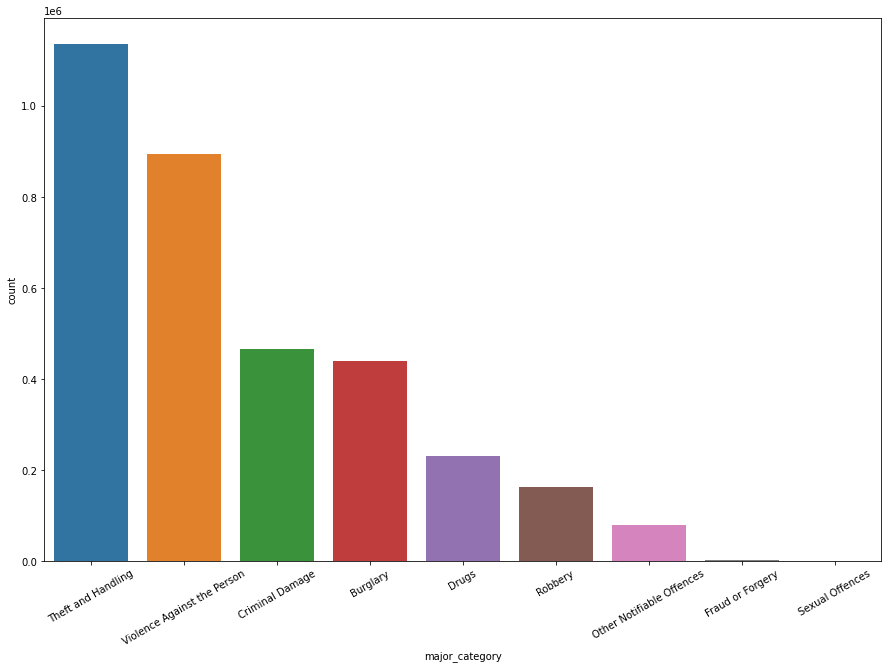

In [47]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="major_category", data = df, order=df['major_category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

<AxesSubplot:xlabel='count', ylabel='minor_category'>

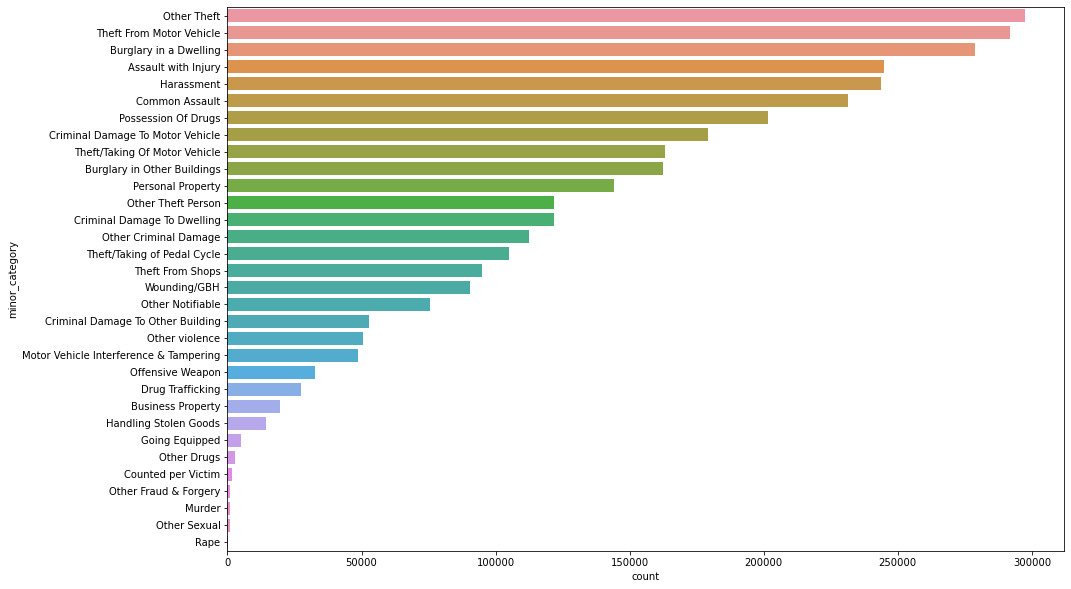

In [48]:
plt.figure(figsize=(15, 10))
sns.countplot(y="minor_category", data = df, order=df['minor_category'].value_counts().index)

In [49]:
df.groupby(['borough'])['value'].sum()

borough
Barking and Dagenham      149447
Barnet                    212191
Bexley                    114136
Brent                     227551
Bromley                   184349
Camden                    275147
City of London               780
Croydon                   260294
Ealing                    251562
Enfield                   193880
Greenwich                 181568
Hackney                   217119
Hammersmith and Fulham    185259
Haringey                  213272
Harrow                    116848
Havering                  138947
Hillingdon                209680
Hounslow                  186772
Islington                 230286
Kensington and Chelsea    171981
Kingston upon Thames       89306
Lambeth                   292178
Lewisham                  215137
Merton                    115654
Newham                    262024
Redbridge                 183562
Richmond upon Thames       96771
Southwark                 278809
Sutton                    100987
Tower Hamlets             228613
Wa

In [51]:
import numpy as np

In [61]:
major_crime = pd.pivot_table(df,values=['value'],
                             index=['borough'],
                             columns=['major_category'],
                             aggfunc=np.sum,fill_value=0)
major_crime.head()

value                                          \
major_category       Burglary Criminal Damage  Drugs Fraud or Forgery   
borough                                                                 
Barking and Dagenham    18103           18888   9188              205   
Barnet                  36981           21024   9796              175   
Bexley                  14973           17244   7346              106   
Brent                   28923           20569  25978              157   
Bromley                 27135           24039   8942              196   

                                                                        \
major_category       Other Notifiable Offences Robbery Sexual Offences   
borough                                                                  
Barking and Dagenham                      2819    6105              49   
Barnet                                    2953    7374              38   
Bexley                                    1999    2338              22   
Brent                                     3711   12473              39   
Bromley                                   2637    4868              31   

                                                                     
major_category       Theft and Handling Violence Against the Person  
borough                                                              
Barking and Dagenham              50999                       43091  
Barnet                            87285                       46565  
Bexley                            40071                       30037  
Brent                             72523                       63178  
Bromley                           69742                       46759

In [63]:
major_crime.reset_index(inplace=True)

In [66]:
major_crime['Total']=major_crime.sum(axis=1)

In [68]:
major_crime.head()

borough    value                         \
major_category                       Burglary Criminal Damage  Drugs   
0               Barking and Dagenham    18103           18888   9188   
1                             Barnet    36981           21024   9796   
2                             Bexley    14973           17244   7346   
3                              Brent    28923           20569  25978   
4                            Bromley    27135           24039   8942   

                                                                   \
major_category Fraud or Forgery Other Notifiable Offences Robbery   
0                           205                      2819    6105   
1                           175                      2953    7374   
2                           106                      1999    2338   
3                           157                      3711   12473   
4                           196                      2637    4868   

                                                                               \
major_category Sexual Offences Theft and Handling Violence Against the Person   
0                           49              50999                       43091   
1                           38              87285                       46565   
2                           22              40071                       30037   
3                           39              72523                       63178   
4                           31              69742                       46759   

                   Total  
major_category            
0               149447.0  
1               212191.0  
2               114136.0  
3               227551.0  
4               184349.0

In [74]:
minor_crime = pd.pivot_table(df,values=['value'],
                             index=['borough'],
                             columns=['minor_category'],
                             aggfunc=np.sum,fill_value=0)
minor_crime.head()

value                              \
minor_category       Assault with Injury Burglary in Other Buildings   
borough                                                                
Barking and Dagenham               13719                        5218   
Barnet                             12516                       10816   
Bexley                              9224                        5589   
Brent                              17479                        7440   
Bromley                            13888                       10278   

                                                                              \
minor_category       Burglary in a Dwelling Business Property Common Assault   
borough                                                                        
Barking and Dagenham                  12885               522          11089   
Barnet                                26165               641          13023   
Bexley                                 9384               342           7612   
Brent                                 21483               750          17243   
Bromley                               16857               594          11127   

                                                                     \
minor_category       Counted per Victim Criminal Damage To Dwelling   
borough                                                               
Barking and Dagenham                132                        4905   
Barnet                              137                        4546   
Bexley                               84                        3662   
Brent                                99                        4883   
Bromley                             161                        5432   

                                                       \
minor_category       Criminal Damage To Motor Vehicle   
borough                                                 
Barking and Dagenham                             8230   
Barnet                                           9369   
Bexley                                           8103   
Brent                                            8433   
Bromley                                         10480   

                                                                         ...  \
minor_category       Criminal Damage To Other Building Drug Trafficking  ...   
borough                                                                  ...   
Barking and Dagenham                              1424              679  ...   
Barnet                                            2106              835  ...   
Bexley                                            1402              689  ...   
Brent                                             2144             1364  ...   
Bromley                                           2425              775  ...   

                                                                          \
minor_category       Other Theft Person Other violence Personal Property   
borough                                                                    
Barking and Dagenham               3086           2172              5583   
Barnet                             6498           1828              6733   
Bexley                             1452           1358              1996   
Brent                              7636           2956             11723   
Bromley                            3000           1626              4274   

                                                                        \
minor_category       Possession Of Drugs Rape Theft From Motor Vehicle   
borough                                                                  
Barking and Dagenham                8482    4                    12664   
Barnet                              8917    6                    25894   
Bexley                              6621    2                    10498   
Brent                              24410   14                    18831   
Bromley                

In [75]:
minor_crime.reset_index(inplace=True)

In [76]:
minor_crime['Total']=minor_crime.sum(axis=1)

In [77]:
minor_crime.head()

borough               value  \
minor_category                       Assault with Injury   
0               Barking and Dagenham               13719   
1                             Barnet               12516   
2                             Bexley                9224   
3                              Brent               17479   
4                            Bromley               13888   

                                                                   \
minor_category Burglary in Other Buildings Burglary in a Dwelling   
0                                     5218                  12885   
1                                    10816                  26165   
2                                     5589                   9384   
3                                     7440                  21483   
4                                    10278                  16857   

                                                                    \
minor_category Business Property Common Assault Counted per Victim   
0                            522          11089                132   
1                            641          13023                137   
2                            342           7612                 84   
3                            750          17243                 99   
4                            594          11127                161   

                                                                             \
minor_category Criminal Damage To Dwelling Criminal Damage To Motor Vehicle   
0                                     4905                             8230   
1                                     4546                             9369   
2                                     3662                             8103   
3                                     4883                             8433   
4                                     5432                            10480   

                                                  ...                 \
minor_category Criminal Damage To Other Building  ... Other violence   
0                                           1424  ...           2172   
1                                           2106  ...           1828   
2                                           1402  ...           1358   
3                                           2144  ...           2956   
4                                           2425  ...           1626   

                                                           \
minor_category Personal Property Possession Of Drugs Rape   
0                           5583                8482    4   
1                           6733                8917    6   
2                           1996                6621    2   
3                          11723               24410   14   
4                           4274                8127    4   

                                                          \
minor_category Theft From Motor Vehicle Theft From Shops   
0                                 12664             6538   
1                                 25894            12189   
2                                 10498             6970   
3                                 18831             9031   
4                                 17681            13766   

                                                                          \
minor_category Theft/Taking Of Motor Vehicle Theft/Taking of Pedal Cycle   
0                                       8094                        2155   
1                                       7237                        2103   
2                                       5486                        1119   
3                                       6572                        3417   
4                                       6866                        1903   

                              Total  
minor_category Wounding/GBH          
0                      3534  149447  
1                      3138  212191  
2                      2087  114136  
3 

In [82]:
year_sum = pd.DataFrame(df.groupby(['year'])['value'].sum())

In [84]:
year_sum.reset_index(inplace=True)

<AxesSubplot:xlabel='year', ylabel='value'>

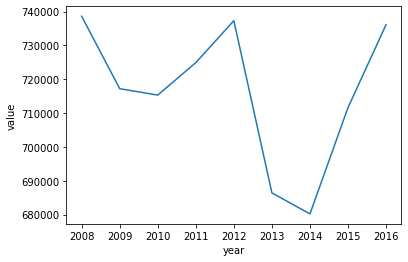

In [90]:
sns.lineplot(data=year_sum, x="year", y="value")

In [91]:
month_sum = pd.DataFrame(df.groupby(['month'])['value'].sum())

In [92]:
month_sum.reset_index(inplace=True)

<AxesSubplot:xlabel='month', ylabel='value'>

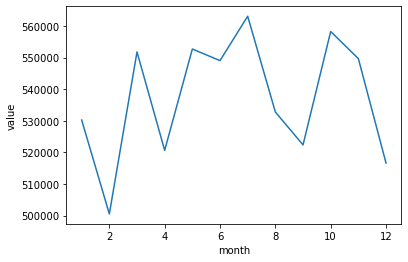

In [94]:
sns.lineplot(data=month_sum, x="month", y="value")

<AxesSubplot:xlabel='month', ylabel='value'>

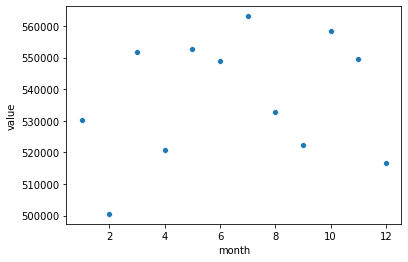

In [95]:
sns.scatterplot(data=month_sum, x="month", y="value")